In [6]:
import os
import numpy as np
import pandas as pd

In [79]:
import matplotlib.pyplot as plt

In [112]:
%matplotlib notebook

In [7]:
dataDir = '../data/zhihu competition'

## 问题信息探索

[问题ID  问题创建时间  问题标题的单字编码序列  问题标题的切词编码序列  问题描述的单字编码序列  问题描述的词编码序列  问题绑定的话题ID]

In [10]:
qs_columns = ['question_id', 'create_time', 'title_SW', 'title_W', 'describe_SW', 'describe_W', 'question_topics']

In [32]:
qs_df = pd.read_csv(os.path.join(dataDir, 'question_info_0926.txt'), sep= '\t', nrows = 5000, names = qs_columns )

In [33]:
qs_df.head()

,question_id,create_time,title_SW,title_W,describe_SW,describe_W,question_topics
0,Q2234111670,D1018-H5,"SW211,SW204,SW1715,SW69,SW2033,SW138,SW57,SW13...","W22414,W963,W10458",-1,-1,"T321,T730,T5784,T4389"
1,Q760329790,D1745-H20,"SW69,SW2033,SW138,SW2616,SW2668,SW36,SW2594,SW...","W12677,W16829,W15201,W6419,W101839","SW146,SW982,SW401,SW297,SW17,SW2616,SW2668,SW3...","W1296,W2118,W12677,W16829,W15201,W6419,W101839...","T278,T12673,T4677"
2,Q741313548,D2032-H21,"SW153,SW662,SW1218,SW853,SW325,SW1056,SW467,SW...","W700,W2781,W3280,W81215","SW1956,SW3583,SW153,SW34,SW35,SW1016,SW586,SW5...","W732,W24400,W48321,W39608,W20788,W219486,W1183...",T226
3,Q3481466230,D2185-H15,"SW22,SW179,SW57,SW451,SW594,SW118,SW882,SW655,...","W3312,W1823,W1505,W638,W166,W461","SW323,SW37,SW1,SW606,SW1227,SW29,SW22,SW179,SW...","W6642,W4214,W3312,W1505,W2205,W232,W294,W7177,...","T51,T4468"
4,Q3966197028,D2269-H17,"SW1622,SW223,SW1218,SW853,SW390,SW220,SW753,SW...","W700,W895,W2253",-1,-1,"T54700,T81,T57,T17670,T43574"


### question id 检查

In [57]:
nquestions= qs_df['question_id'].nunique()

In [58]:
nquestions

5000

In [60]:
assert nquestions == len(qs_df)

### 问题时间检查

In [63]:
import math
class Time():
    def __init__(self, string):
        assert isinstance(string, str), 'expect input to be a str instance'
        self.time_string = string
        day_str, hour_str = string.split('-')
        self.day = int(day_str.rsplit('D'))
        self.hour = int(hour_str.rsplit('H'))
        
    def __sub__(self, time):
        return abs((time.day - self.day) * 24 + time.hour - self.hour)

In [64]:
import re

In [74]:
qs_df['create_day'] = qs_df['create_time'].apply(lambda x: int(x.split('-')[0].lstrip('D')))

In [75]:
qs_df['create_hour'] = qs_df['create_time'].apply(lambda x: int(x.split('-')[1].lstrip('H')))

In [76]:
qs_df['create_day'].describe()

count    5000.00000
mean     3692.35940
std       413.57447
min       906.00000
25%      3800.00000
50%      3836.00000
75%      3858.00000
max      3874.00000
Name: create_day, dtype: float64

In [77]:
qs_df['create_day'].max() - qs_df['create_day'].min()

2968

#### 问题创建天数 横跨 10年？

<IPython.core.display.Javascript object>


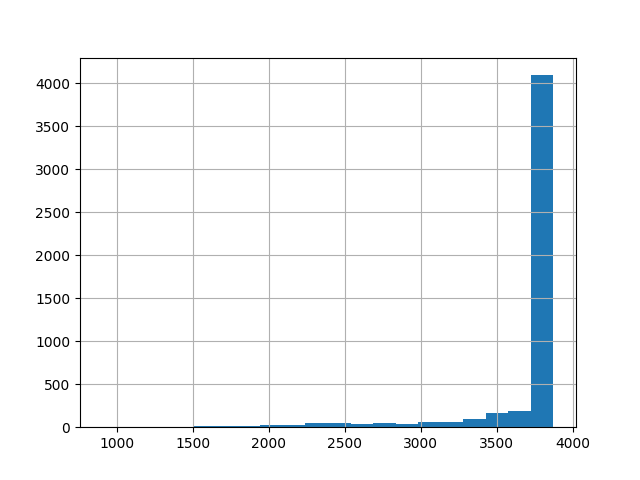

In [84]:
qs_df['create_day'].hist(bins= 20)

#### 从问题时间分布看，应该可以认为较早的问题id属于脏数据

### 问题标题长度统计

In [34]:
qs_df['title_SW_length'] = qs_df['title_SW'].apply(lambda x: x.count(',') + 1)

In [35]:
qs_df['title_SW_length'].describe()

count    5000.000000
mean       21.693200
std        10.427714
min         4.000000
25%        14.000000
50%        19.000000
75%        27.000000
max        62.000000
Name: title_SW_length, dtype: float64

In [36]:
qs_df['title_W_length'] = qs_df['title_W'].apply(lambda x: x.count(',') + 1)

In [37]:
qs_df['title_W_length'].describe()

count    5000.000000
mean        6.770200
std         3.585968
min         1.000000
25%         4.000000
50%         6.000000
75%         9.000000
max        21.000000
Name: title_W_length, dtype: float64

In [17]:
s = qs_df['title_SW'].iloc[0]

### 问题描述长度统计

In [40]:
np.sum(qs_df['describe_SW'] == '-1')

2569

In [41]:
describe_empty_ratio = np.sum(qs_df['describe_SW'] == '-1') / len(qs_df)

In [42]:
describe_empty_ratio

0.5138

#### 问题描述为空的比例

In [45]:
qs_df['describe_SW_length']= qs_df['describe_SW'].apply(lambda x: x.count(',')

In [46]:
qs_df['describe_SW_length'].describe()

count    5000.000000
mean       51.763200
std       129.870773
min         0.000000
25%         0.000000
50%         0.000000
75%        55.000000
max      2692.000000
Name: describe_SW_length, dtype: float64

#### 问题描述最长约2000字，最短没有，方差很大，问题描述的细致程度应该会和邀请人的回答意愿相关

### 问题话题分布

In [47]:
qs_df['question_topics_length'] = qs_df['question_topics'].apply(lambda x: x.count(',') + 1)

In [48]:
qs_df['question_topics_length'].describe()

count    5000.000000
mean        2.767000
std         1.279781
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: question_topics_length, dtype: float64

In [52]:
topic_set = set()
for topics in qs_df['question_topics']:
    topic_list = topics.split(',')
    topic_set = topic_set | set(topic_list)

In [53]:
len(topic_set)

5833

#### 问题话题标签数，标签还是很多的

## 邀请信息探索

In [86]:
invite_columns = ['question_id', 'user_id', 'create_time', 'isAnswer']

In [177]:
invite_df = pd.read_csv(os.path.join(dataDir, 'invite_info_0926.txt'), sep = '\t', names = invite_columns, nrows= None)

In [178]:
invite_df.head()

,question_id,user_id,create_time,isAnswer
0,Q2166419046,M401693808,D3865-H22,0
1,Q1550017551,M3392373099,D3844-H11,0
2,Q604029601,M2317670257,D3862-H15,0
3,Q2350061229,M1618461867,D3849-H11,0
4,Q2443223942,M3544409350,D3867-H4,0


In [179]:
len(invite_df)

9489162

#### 未清洗前1000万条邀请数据

In [180]:
nAnswer = np.sum(invite_df['isAnswer'] == 1)

In [181]:
nAnswer / len(invite_df)

0.1773515933229931

#### 正负样本比例约为　1:4

## 回答信息探索

[回答ID 问题ID 用户ID 回答创建时间 回答内容的单字编码序列 回答内容的切词编码序列 回答是否被标优 回答是否被推荐 回答是否被收入圆桌 是否包含图片 是否包含视频 回答字数 点赞数 取赞数 评论数 收藏数 感谢数 举报数 没有帮助数 反对数]

In [100]:
answer_columns = ['answer_id', 'question_id', 'user_id', 'create_time', 'answer_SW', 'answer_W',
                 'is_good', 'is_recommend', 'is_include', 'has_picture', 'has_video', 'word_count', 'num_zan',
                 'num_comment', 'num_collect', 'num_thanks', 'num_report', 'num_useless', 'num_oppose']

In [107]:
answer_df = pd.read_csv(os.path.join(dataDir, 'answer_info_0926.txt'), sep = '\t', names = answer_columns, nrows = 5000, index_col = False)

In [108]:
answer_df.head()

,answer_id,question_id,user_id,create_time,answer_SW,answer_W,is_good,is_recommend,is_include,has_picture,has_video,word_count,num_zan,num_comment,num_collect,num_thanks,num_report,num_useless,num_oppose
0,A2502060945,Q1867533817,M625498202,D3808-H7,"SW13,SW19,SW44,SW150,SW23,SW594,SW1254,SW91,SW...","W239,W10528,W142,W20372,W6473,W10,W24,W4527,W2...",0,0,0,0,0,41,1,0,1,0,1,0,0
1,A2847829478,Q3366788616,M142330444,D3810-H17,"SW898,SW3656,SW2,SW413,SW601,SW2,SW2541,SW681,...","W4628,W66060,W1607,W2647,W53385,W109029,W319,W...",0,0,0,0,0,204,1,0,0,3,1,0,0
2,A2005999231,Q4264694221,M771499642,D3853-H13,"SW9,SW510,SW573,SW1348,SW1304,SW326,SW509,SW22...","W3532,W69108,W12395,W81311,W498,W850,W107789,W...",0,0,0,0,0,54,2,0,1,0,0,0,0
3,A14821523,Q1088851650,M2282072267,D3859-H18,"SW7,SW16,SW5,SW144,SW302,SW20,SW1752,SW60,SW75...","W1425,W1676,W3700,W325,W6485,W1090,W8342,W9689...",0,0,0,0,0,42,1,0,1,0,1,0,0
4,A731550034,Q1023877868,M2282072267,D3855-H22,"SW7,SW15,SW596,SW407,SW1698,SW68,SW2,SW56,SW59...","W23420,W2610,W5506,W1489,W8749,W504,W1718,W252...",0,0,0,0,0,44,0,0,0,0,0,0,0


In [109]:
answer_df.describe()

,is_good,is_recommend,is_include,has_picture,has_video,word_count,num_zan,num_comment,num_collect,num_thanks,num_report,num_useless,num_oppose
count,5000.00000,5000.0,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000
mean,0.00100,0.0,0.0,0.091200,0.003400,165.542200,4.986200,0.334600,1.369800,0.81400,0.567000,0.031400,0.01380
std,0.03161,0.0,0.0,0.287922,0.058216,525.543189,88.339504,3.829984,12.517651,13.45685,7.637956,1.046629,0.20789
min,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,0.00000,0.0,0.0,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,0.00000,0.0,0.0,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,0.00000,0.0,0.0,0.000000,0.000000,144.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
max,1.00000,0.0,0.0,1.000000,1.000000,25901.000000,3875.000000,195.000000,589.000000,680.00000,294.000000,73.000000,9.00000


<IPython.core.display.Javascript object>


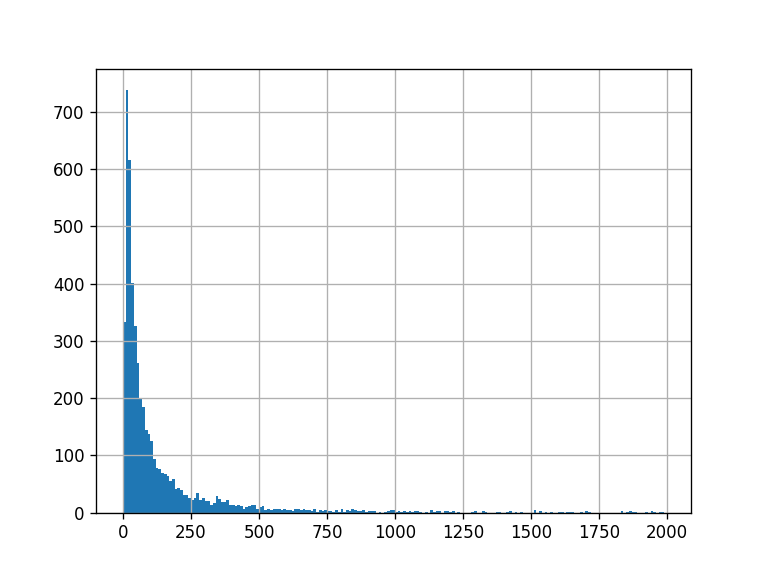

In [119]:
answer_df['word_count'].hist(bins= [i * 10 for i in range(200)])

#### 回答字数分布

<IPython.core.display.Javascript object>


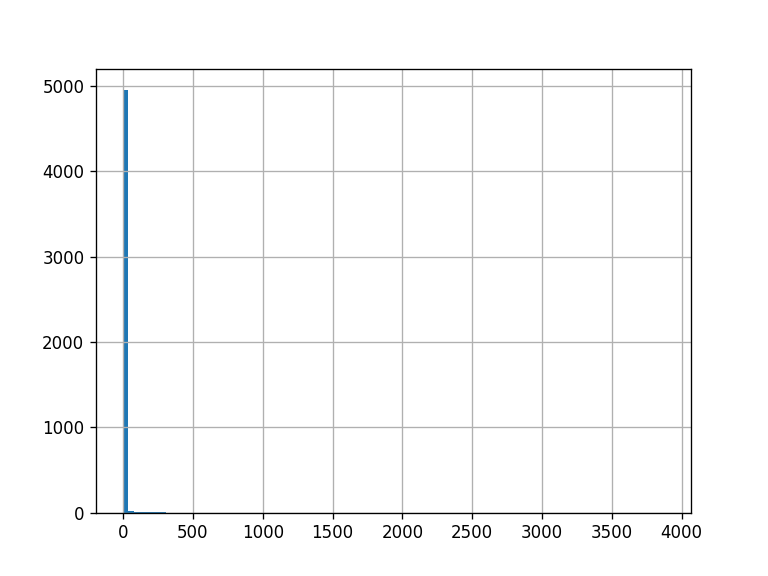

In [124]:
answer_df['num_zan'].hist(bins = 100)

#### 点赞数分布，极其不均衡，可能服从指数分布

<IPython.core.display.Javascript object>


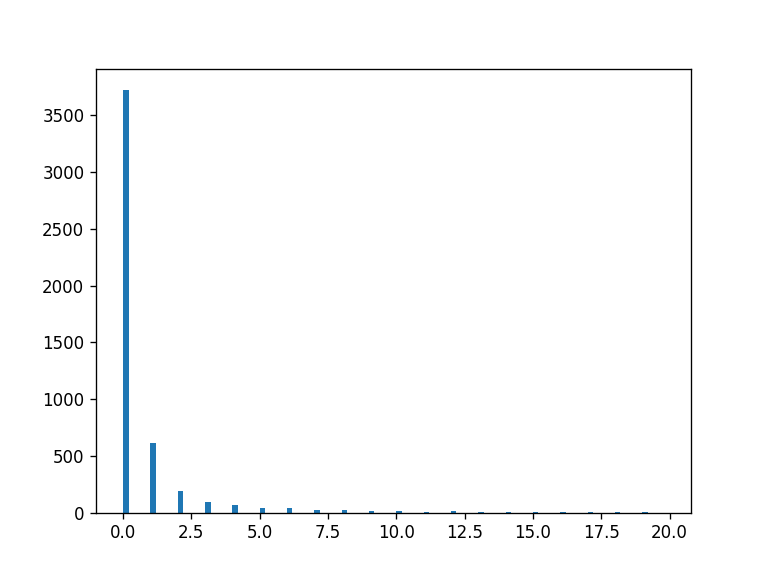

(array([3.722e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.170e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.890e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.700e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.300e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.900e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.500e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 8.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+0

In [128]:
plt.hist(answer_df['num_zan'], bins = [0.2 * i for i in range(100)])

#### 似乎在指数上服从　指数分布

#### 许多回答特征分布都是非常不均衡，绝大部分值是０，可能需要进行聚类，或者分箱转化为类别特征

## 用户画像探索

1.用户ID, 格式为 Mxxx。

 

2.性别。

 

3.创作关键词的编码序列，格式为 W1,W2,W3,...,Wn , 表示创作关键词的编码序号，如果创作关键词为空，则用 -1 进行占位。

 

4.创作数量等级。

 

5.创作热度等级。

 

6.注册类型。

 

7.注册平台。

 

8.访问频率，有五种取值 [new | daily | weekly | monthly | unknow] , 分别对应为 [新用户 | 日活用户 | 周活用户 | 月活用户 | 未知]。

 

9.用户二分类特征A，两种取值 0 或 1。

 

10.用户二分类特征B，两种取值 0 或 1。

 

11.用户二分类特征C，两种取值 0 或 1。

 

12.用户二分类特征D， 两种取值 0 或 1。

 

13.用户二分类特征E， 两种取值 0 或 1。

 

14.用户分类特征A, 格式为 MDxxx。

 

15.用户分类特征B, 格式为 BRxxx。

 

16.用户分类特征C, 格式为 PVxxx。

 

17.用户分类特征D, 格式为 CTxxx。

 

18.用户分类特征E, 格式为 PFxxx 。

 

19.用户的盐值分数。

 

20.用户关注的话题，格式为 T1,T2,T3,...,Tn , 表示用户关注话题的序列编号 (最多 100 个)，如果关注话题为空，则用 -1 进行占位。

 

21.用户感兴趣的话题，格式为 T1:0.2,T2:0.5:T3,-0.3,...,Tn:0.42 , 表示用户感兴趣的话题序列编号及喜好程度分数 (最多 10 个)，如果感兴趣话题为空，则用 -1 进行占位。

In [133]:
user_columns = ['user_id', 'gender', 'keywords', 'creation_num_level', 'creation_heat_level', 'register_type', 'register_platform',
               'visit_freq', 'binary_A', 'binary_B', 'binary_C', 'binary_D', 'binary_E', 'category_A', 'category_B', 'category_C', 
               'category_D', 'category_E', 'salt_value', 'follow_topics', 'interest_topics']

In [162]:
user_df = pd.read_csv(os.path.join(dataDir, 'member_info_0926.txt'), sep = '\t', names = user_columns, nrows = None)

In [163]:
user_df.head()

,user_id,gender,keywords,creation_num_level,creation_heat_level,register_type,register_platform,visit_freq,binary_A,binary_B,...,binary_D,binary_E,category_A,category_B,category_C,category_D,category_E,salt_value,follow_topics,interest_topics
0,M1934753188,male,-1,0.0,0.0,unknown,unknown,monthly,0,1,...,1,0,MD470265,BR470265,PV929066,CT929066,PF470265,764,T540,"T21107:1.7915097,T405:1.6123838,T4436:1.518003..."
1,M595924114,male,-1,0.0,0.0,unknown,unknown,daily,0,0,...,1,1,MD195122,BR596936,PV002320,CT840234,PF470265,671,"T44126,T15940,T839,T8978,T2934,T1113,T3914,T12...","T18016:2.0650618,T2384:1.2503042,T1142:1.13569..."
2,M1473482940,female,-1,0.0,0.0,unknown,unknown,weekly,0,1,...,1,0,MD116493,BR641329,PV170953,CT470265,PF470265,454,"T30874,T2113,T8656,T21,T523,T8,T116,T5727,T68,...","T46:1.330939,T2159:1.1296458,T379:1.1241927,T1..."
3,M578477092,male,-1,0.0,0.0,unknown,unknown,daily,1,1,...,1,0,MD889589,BR803759,PV545833,CT545833,PF470265,588,"T946,T7323,T297,T2660,T36067,T53107,T2654,T507...","T15918:1.9479566,T8106:1.8578106,T4787:1.58486..."
4,M1088794709,male,-1,0.0,0.0,unknown,unknown,weekly,0,1,...,0,0,MD825760,BR641329,PV071037,CT470265,PF470265,361,"T582,T558,T28776,T5186,T9081,T2419,T2693,T2299...","T65:1.5992582,T867:1.3179373,T93:1.2095009,T31..."


In [164]:
user_df.describe()

,keywords,creation_num_level,creation_heat_level,binary_A,binary_B,binary_C,binary_D,binary_E,salt_value
count,1931654.0,1931654.0,1931654.0,1.931654e+06,1.931654e+06,1.931654e+06,1.931654e+06,1.931654e+06,1.931654e+06
mean,-1.0,0.0,0.0,5.973637e-01,3.117147e-01,2.953117e-02,1.475352e-01,5.420381e-02,3.466341e+02
std,0.0,0.0,0.0,4.904288e-01,4.631941e-01,1.692900e-01,3.546388e-01,2.264195e-01,8.260136e+01
min,-1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.500000e+01
25%,-1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.950000e+02
50%,-1.0,0.0,0.0,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+02
75%,-1.0,0.0,0.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.730000e+02
max,-1.0,0.0,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.900000e+02


#### 貌似绝大部分用户创作总数，和创作热度特征都是空的，绝大部分用户都是不活跃用户，很少回答问题

#### 事实上所有用户创作数和创作热度特征都是空的，这两个特征是无用特征

In [165]:
user_df['register_type'].unique()

array(['unknown'], dtype=object)

#### 所有用户的注册类型都是未知，无用特征

In [166]:
user_df['register_platform'].unique()

array(['unknown'], dtype=object)

#### 所有用户的注册平台都是未知，无用特征

#### 类别特征检查

In [171]:
for attr in ['A', 'B', 'C', 'D', 'E']:
    print(user_df['binary_%s' %(attr, )].nunique() == 2)

True
True
True
True
True


In [172]:
user_df['category_A'].nunique()

2561

In [173]:
user_df['category_B'].nunique()

291

In [174]:
user_df['category_C'].nunique()

428

In [175]:
user_df['category_D'].nunique()

1556

In [176]:
user_df['category_E'].nunique()

2

#### 以上是用户属性 多值类别属性 类别数统计，有些类别数还是挺多的

In [145]:
user_df['follow_topics_count'] = user_df['follow_topics'].apply(lambda x: x.count(',') + 1)

In [146]:
user_df['follow_topics_count'].describe()

count    50000.000000
mean        15.702700
std         21.155512
min          1.000000
25%          1.000000
50%          8.000000
75%         20.000000
max        100.000000
Name: follow_topics_count, dtype: float64

In [149]:
np.sum(user_df['follow_topics'] == '-1')/len(user_df) * 100

22.62

#### 百分之 22 的用户关注话题为空，考虑用均值填充

In [153]:
np.sum(user_df['interest_topics'] == '-1')/len(user_df) * 100

26.035999999999998

#### 26% 用户感兴趣话题为空，同样考虑用均值填充

In [152]:
user_df['interest_topics_count'] = user_df['interest_topics'].apply(lambda x: x.count(',') + 1)

In [154]:
user_df['interest_topics_count'].describe()

count    50000.000000
mean         6.566040
std          4.133456
min          1.000000
25%          1.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: interest_topics_count, dtype: float64

In [155]:
user_df['interest_topics_count'].unique()

array([10,  1,  3,  4,  5,  2,  6,  7,  8,  9])

#### 访问频率特征无缺失

In [156]:
user_df['visit_freq'].unique()

array(['monthly', 'daily', 'weekly', 'unknown', 'new'], dtype=object)

#### 创作关键词特征

In [161]:
user_df['keywords'].head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: keywords, dtype: int64

In [160]:
np.sum(user_df['keywords'] == -1) / len(user_df) * 100

100.0

#### 创作关键词几乎都是空的，应该与回答创作的内容有关